# Test query

2024/04/28 H. Akitaya

In [1]:
fn_json = 's240422ed.json'

In [2]:
from astropy.table import Table

In [3]:
import pandas as pd

In [4]:
import json

In [5]:
json_f = open(fn_json, 'r')

In [6]:
json_load = json.load(json_f)

In [7]:
df = pd.DataFrame(json_load[1:], columns=json_load[0])

In [8]:
df

galid    eventid      prob                    inserted  \
0    GL081312-280235  S240422ed  0.005892  2024-04-23 02:50:01.350809   
1    GL081119-254058  S240422ed  0.004459  2024-04-23 02:50:01.350809   
2    GL081452-292944  S240422ed  0.004372  2024-04-23 02:50:01.350809   
3    GL082619-205052  S240422ed  0.004028  2024-04-23 02:50:01.350809   
4    GL081628-274822  S240422ed  0.003935  2024-04-23 02:50:01.350809   
..               ...        ...       ...                         ...   
194  GL081438-331902  S240422ed  0.001302  2024-04-23 02:50:01.350809   
195  GL080640-305102  S240422ed  0.001290  2024-04-23 02:50:01.350809   
196  GL081623-233218  S240422ed  0.001288  2024-04-23 02:50:01.350809   
197  GL081925-331610  S240422ed  0.001287  2024-04-23 02:50:01.350809   
198  GL080720-293536  S240422ed  0.001276  2024-04-23 02:50:01.350809   

           ra      dec      dist  OptExpected  NirExpected     state  \
0    123.2980 -28.0429  169.5815         22.9         21.1   Curated   
1    122.8303 -25.6829  168.2786         22.9         21.1   Curated   
2    123.7146 -29.4956  199.8425         23.3         21.5  Analyzed   
3    126.5800 -20.8478  185.0432         23.1         21.3  Analyzed   
4    124.1169 -27.8062  181.3769         23.1         21.3  Analyzed   
..        ...      ...       ...          ...          ...       ...   
194  123.6567 -33.3172  191.1814         23.2         21.4  Analyzed   
195  121.6656 -30.8505  219.7888         23.5         21.7  Analyzed   
196  124.0977 -23.5383  221.0113         23.5         21.7  Analyzed   
197  124.8537 -33.2694  208.8808         23.4         21.6  Analyzed   
198  121.8334 -29.5935  147.9896         22.7         20.9   Curated   

                                       obsids                     updated  \
0         Subaru,MITSuME-Okayama,Kanata-HONIR  2024-04-26 11:16:27.370559   
1                                      Subaru  2024-04-24 09:07:22.059373   
2                                      Subaru  2024-04-23 17:10:19.447458   
3    Subaru,MITSuME-Akeno,BAO101cm,Nayuta-NIC  2024-04-27 13:22:50.530351   
4                                      Subaru  2024-04-23 17:31:46.962495   
..                                        ...                         ...   
194                                    Subaru  2024-04-25 03:56:19.172607   
195                                    Subaru  2024-04-25 03:57:04.961336   
196                                    Subaru  2024-04-25 04:10:09.620908   
197                                    Subaru  2024-04-25 03:57:29.145035   
198                                    Subaru  2024-04-26 11:27:31.628206   

                         filter and depth (5&sigma;AB) hastransient  
0           Ks=20.29,Y=20.15,Ks=20.20,Ks=20.41,Y=20.13          YES  
1                                     Ks=19.75,Y=20.19         None  
2                                    Ks=999.00,Y=19.83         None  
3    Ks=20.46,Y=999.00,Y=19.92,R=17.59,Ks=999.00,Ks...          YES  
4                                     Ks=20.15,Y=20.07         None  
..                                                 ...          ...  
194                         Ks=20.30,Ks=20.17,Y=999.00         None  
195                          Ks=19.23,Ks=19.94,Y=18.74         None  
196                  Ks=20.30,Ks=20.51,Y=19.82,Y=19.86         None  
197                                  Ks=19.17,Y=999.00         None  
198                         Ks=999.00,Ks=20.06,Y=19.35         None  

[199 rows x 14 columns]

In [9]:
len(df)

199

In [10]:
from vista import VISTA

In [11]:
band = 'Ks'

In [12]:
from astropy.coordinates import SkyCoord

In [13]:
def get_lb(ra, dec):
    coord = SkyCoord(ra, dec, unit='deg')
    return(coord.galactic.l.deg, coord.galactic.b.deg)

In [15]:
catalog_result = {}
for i in range(len(df)):
    vista = VISTA(debug=False, cache=False)
    galid = df['galid'][i]
    ra = df['ra'][i]
    dec = df['dec'][i]
    #print(ra, dec)
    vista.set_coord(ra, dec)
    vista.query_archive(band=band)
    try:
        survey = vista.query_table['obs_collection'][0]
    except:
        survey = 'None'
    l, b = get_lb(ra, dec)
    print(galid, ra, dec, l, b, survey)
    if survey not in catalog_result:
        catalog_result[survey] = {'ra': [ra], 'dec': [dec]}
    else:
        catalog_result[survey]['ra'].append(ra)
        catalog_result[survey]['dec'].append(dec)
        

GL081312-280235 123.298 -28.0429 246.98460126469726 3.435529021431425 None
GL081119-254058 122.8303 -25.6829 244.77552594506156 4.37700942767283 VHS
GL081452-292944 123.7146 -29.4956 248.39993792097724 2.9388349288858353 VVVX
GL082619-205052 126.58 -20.8478 242.63916340307458 9.921693370762286 VHS
GL081628-274822 124.1169 -27.8062 247.18746509756036 4.169407789129675 VHS
GL080551-255848 121.4613 -25.98 244.35973470357314 3.179318752146243 None
GL081116-305424 122.8183 -30.9066 249.15188734740474 1.5153250764301114 VVVX
GL081855-301427 124.7307 -30.2409 249.51159028697268 3.2545588489620414 VVVX
GL081051-330116 122.7131 -33.021 250.87289559907867 0.28340564911880217 None
GL081608-315204 124.0342 -31.8679 250.52713549636456 1.849615782840282 VVVX
GL080620-312607 121.5841 -31.4354 249.02279772730407 0.341396731899675 None
GL081737-311300 124.4038 -31.2167 250.16268417453037 2.474632073644002 VVVX
GL080501-324313 121.2548 -32.7203 249.95711615981958 -0.5837452361869968 None
GL082342-291616

In [16]:
for key in catalog_result:
    print(key, len(catalog_result[key]['ra']))

None 70
VHS 86
VVVX 43


In [19]:
import pickle

In [20]:
fn_pkl = 'vista_ks_results.pkl'

In [21]:
with open(fn_pkl, 'wb') as f:
    pickle.dump(catalog_result, f)

In [57]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'labellines'

In [28]:
fig = plt.figure(figsize=(4,12))

<Figure size 400x1200 with 0 Axes>

In [55]:
def get_tbl_galgrid(b):
    tbl_galgrid = Table(names=['ra', 'dec'])
    for l in range(360):
        c = SkyCoord(l, b, unit='deg', frame='galactic')
        tbl_galgrid.add_row([c.fk5.ra.deg, c.fk5.dec.deg])
    return tbl_galgrid

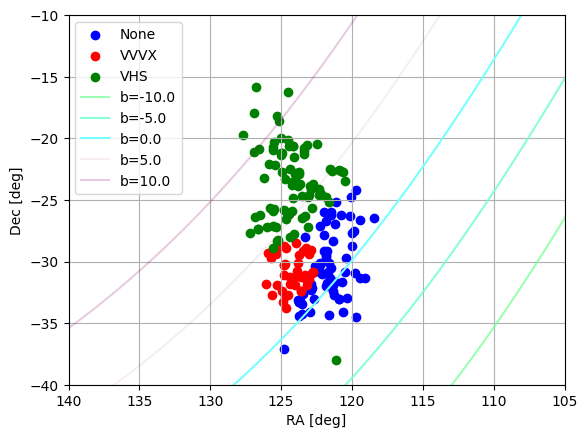

In [74]:
ax1 = plt.subplot(111)
ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')
ax1.set_xlim([140, 105])
ax1.set_ylim([-40,-10])
ax1.grid()
ax1.scatter(catalog_result['None']['ra'], catalog_result['None']['dec'], color='blue', label='None')
ax1.scatter(catalog_result['VVVX']['ra'], catalog_result['VVVX']['dec'], color='red', label='VVVX')
ax1.scatter(catalog_result['VHS']['ra'], catalog_result['VHS']['dec'], color='green', label='VHS')

for b in np.linspace(-10, 10, 5):
    color = f'#{int(65535/2 + b*10):x}'
    tbl_galgrid = get_tbl_galgrid(b)
    ax1.plot(tbl_galgrid['ra'], tbl_galgrid['dec'], label=f'b={b}', color=color)
ax1.legend()

## Y-band check

In [97]:
band = 'Y'

In [98]:
catalog_result = {}
for i in range(len(df)):
    vista = VISTA(debug=False, cache=False)
    galid = df['galid'][i]
    ra = df['ra'][i]
    dec = df['dec'][i]
    #print(ra, dec)
    vista.set_coord(ra, dec)
    vista.query_archive(band=band)
    try:
        survey = vista.query_table['obs_collection'][0]
    except:
        survey = 'None'
    l, b = get_lb(ra, dec)
    print(galid, ra, dec, l, b, survey)
    if survey not in catalog_result:
        catalog_result[survey] = {'ra': [ra], 'dec': [dec]}
    else:
        catalog_result[survey]['ra'].append(ra)
        catalog_result[survey]['dec'].append(dec)
        

GL081312-280235 123.298 -28.0429 246.98460126469726 3.435529021431425 None
GL081119-254058 122.8303 -25.6829 244.77552594506156 4.37700942767283 None
GL081452-292944 123.7146 -29.4956 248.39993792097724 2.9388349288858353 None
GL082619-205052 126.58 -20.8478 242.63916340307458 9.921693370762286 None
GL081628-274822 124.1169 -27.8062 247.18746509756036 4.169407789129675 None
GL080551-255848 121.4613 -25.98 244.35973470357314 3.179318752146243 None
GL081116-305424 122.8183 -30.9066 249.15188734740474 1.5153250764301114 None
GL081855-301427 124.7307 -30.2409 249.51159028697268 3.2545588489620414 None
GL081051-330116 122.7131 -33.021 250.87289559907867 0.28340564911880217 None
GL081608-315204 124.0342 -31.8679 250.52713549636456 1.849615782840282 None
GL080620-312607 121.5841 -31.4354 249.02279772730407 0.341396731899675 None
GL081737-311300 124.4038 -31.2167 250.16268417453037 2.474632073644002 None
GL080501-324313 121.2548 -32.7203 249.95711615981958 -0.5837452361869968 None
GL082342-291

In [99]:
for key in catalog_result:
    print(key, len(catalog_result[key]['ra']))

None 199


In [100]:
type(catalog_result)

dict

In [102]:
import pickle

In [103]:
with open('vista_y_results.pkl', 'wb') as f:
    pickle.dump(catalog_result, f)

In [104]:
!ls *pkl

vista_y_results.pkl
